In [1]:
import numpy as np
from sympy import symbols, Matrix
from scipy.integrate import solve_ivp
import scipy.linalg as la
import matplotlib.pylab as plt

In [2]:
tspan = np.linspace(0, 100, 100)

def sortEig(A):
    l, v = la.eig(A)
    idx = np.argsort(np.abs(l))
    l_sorted = l[idx]
    v_sorted = v[:, idx]
    return l_sorted, v_sorted

def ode_system(t, y, R12, R14, R23, R25, R36, R45, R56, KA, KR, gamma3, gamma4, gamma5, delta, damp1 = 1, damp2 = 1, damp3 = 1, damp4 = 1, damp5 = 1, damp6 = 1):
    n1, n2, n3, n4, n5, P = y * [damp1, damp2, damp3, damp4, damp5, damp6]
    sum_n345 = n3 + n4 + n5
    CC_A = 1 - sum_n345 / KA
    CC_R = 1 - sum_n345 / KR
    dn1dt = - (R12 + R14)*n1
    dn2dt = R12*n1 - (R23 + R25)*n2
    dn3dt = R23*n2 - R36*n3 + gamma3*n3*CC_A - delta*n3
    dn4dt = R14*n1 - R45*n4 + gamma4*n4*CC_R - delta*n4
    dn5dt = R25*n2 + R45*n4 - R56*n5 + gamma5*n5*CC_R - delta*n5
    dPdt = (R56*n5 + R36*n3)*(1-P)
    return [dn1dt, dn2dt, dn3dt, dn4dt, dn5dt, dPdt]

def ode_system_linear(t, y, R12, R14, R23, R25, R36, R45, R56, KA, KR, gamma3, gamma4, gamma5, delta, damp1 = 1, damp2 = 1, damp3 = 1, damp4 = 1, damp5 = 1, damp6 = 1):
    n1, n2, n3, n4, n5, P = y * [damp1, damp2, damp3, damp4, damp5, damp6]
    dn1dt = - (R12 + R14)*n1
    dn2dt = R12*n1 - (R23 + R25)*n2
    dn3dt = R23*n2 - R36*n3 + gamma3*n3 - delta*n3
    dn4dt = R14*n1 - R45*n4 + gamma4*n4 - delta*n4
    dn5dt = R25*n2 + R45*n4 - R56*n5 + gamma5*n5 - delta*n5
    dPdt = (R56*n5 + R36*n3)
    return [dn1dt, dn2dt, dn3dt, dn4dt, dn5dt, dPdt]

N_crypts = 1e+7
r1 = 150
u = 10e-7 * r1
mu = 10e-9 * r1
gamma3 = 0.2
gamma4 = 0.077
gamma5 = 0.077
delta = 0.05
KA = 1000
KR = 600

values = {
    "R12": 2 * u,
    "R14": mu,
    "R23": u,
    "R25": mu,
    "R36": mu,
    "R45": 2 * u,
    "R56": u,
    "N_crypts": N_crypts,
    "K_A": KA,
    "K_R": KR,
    "gamma_3": gamma3,
    "gamma_4": gamma4,
    "gamma_5": gamma5,
    "delta": delta,
}

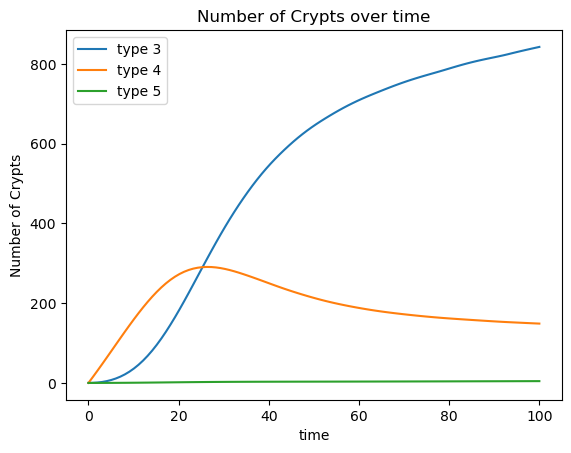

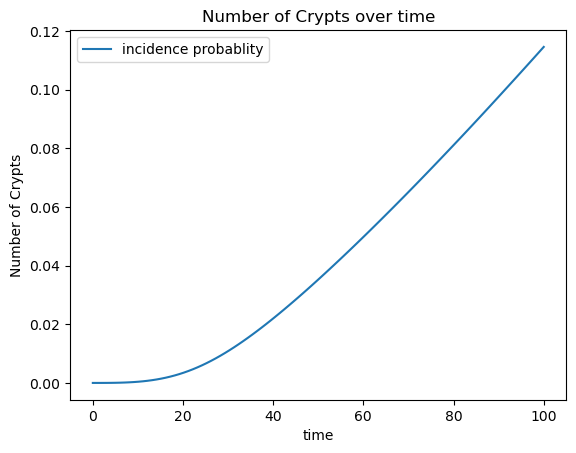

In [3]:
sol = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta))

# plt.plot(sol.t, sol.y[0,:], label='1') # this is too big to plot
# plt.plot(sol.t, sol.y[1,:], label="type 2") # linear growth
plt.plot(sol.t, sol.y[2,:], label="type 3")
plt.plot(sol.t, sol.y[3,:], label="type 4")
plt.plot(sol.t, sol.y[4,:], label="type 5")
# plt.plot(sol.t, sol.y[5,:], label='incidence probablity')
plt.xlabel('time')
plt.ylabel('Number of Crypts')
plt.legend(loc='upper left')
plt.title("Number of Crypts over time")
plt.savefig('figures/Simulation.png')
plt.show()

plt.plot(sol.t, sol.y[5,:], label='incidence probablity')
plt.xlabel('time')
plt.ylabel('Number of Crypts')
plt.legend(loc='upper left')
plt.title("Number of Crypts over time")
plt.savefig('figures/SimulationIncidenceProbabililty.png')
plt.show()


Case 1: SSE = 1309058.3880604329
Case 2: SSE = 1308959.0220918597
Case 3: SSE = 135109.6278485661
Case 4: SSE = 1614932.6983212233
Case 5: SSE = 1614654.7754348696
Case 6: SSE = 1615464.5992486347
Max SSE occurs at case 6, with value: 1615464.5992486347


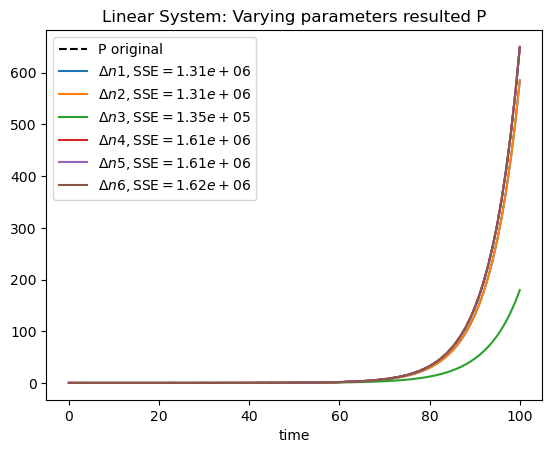

In [4]:
# simulated variation in linear ode system
print()
sol_0 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 1, 1))
sol_1 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 0.9, 1, 1, 1, 1, 1))
sol_2 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 0.9, 1, 1, 1, 1))
sol_3 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 0.9, 1, 1, 1))
sol_4 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 0.9, 1, 1))
sol_5 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 0.9, 1))
sol_6 = solve_ivp(ode_system_linear, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 1, 0.9))

# Compute SSE (Sum of Squared Errors) for each case. Notice the less the SSE the less the perturbation due to varying parameters. So we are looking for the max deviation.
SSEs = []
for i, sol_case in enumerate([sol_1, sol_2, sol_3, sol_4, sol_5, sol_6], start=1):
    sse = np.sum((sol.y[5, :] - sol_case.y[5, :]) ** 2)
    print(f"Case {i}: SSE = {sse}")
    SSEs.append(sse)
    
max_SSE_value = max(SSEs)
max_SSE_case = SSEs.index(max_SSE_value) + 1  # Adding 1 to match the 1-based indexing in the print output

print(f"Max SSE occurs at case {max_SSE_case}, with value: {max_SSE_value}")

plt.plot(sol.t, sol_0.y[5,:], label='P original', linestyle='--', color='black')
plt.plot(sol.t, sol_1.y[5, :], label=fr'$\Delta n1, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
plt.plot(sol.t, sol_2.y[5, :], label=fr'$\Delta n2, \mathrm{{SSE}} = {SSEs[1]:.2e}$')
plt.plot(sol.t, sol_3.y[5, :], label=fr'$\Delta n3, \mathrm{{SSE}} = {SSEs[2]:.2e}$')
plt.plot(sol.t, sol_4.y[5, :], label=fr'$\Delta n4, \mathrm{{SSE}} = {SSEs[3]:.2e}$')
plt.plot(sol.t, sol_5.y[5, :], label=fr'$\Delta n5, \mathrm{{SSE}} = {SSEs[4]:.2e}$')
plt.plot(sol.t, sol_6.y[5, :], label=fr'$\Delta n6, \mathrm{{SSE}} = {SSEs[5]:.2e}$')
plt.xlabel('time')
plt.legend(loc='upper left')
plt.title("Linear System: Varying parameters resulted P")
plt.savefig('figures/LinearSensitivity.png')
plt.show()

Case 1: SSE = 0.00029509785752201756
Case 2: SSE = 0.0004963767570320704
Case 3: SSE = 0.0001274955094533886
Case 4: SSE = 5.523188399643696e-07
Case 5: SSE = 4.879035322559763e-05
Case 6: SSE = 6.542317466112232e-06
Max SSE occurs at case 2, with value: 0.0004963767570320704


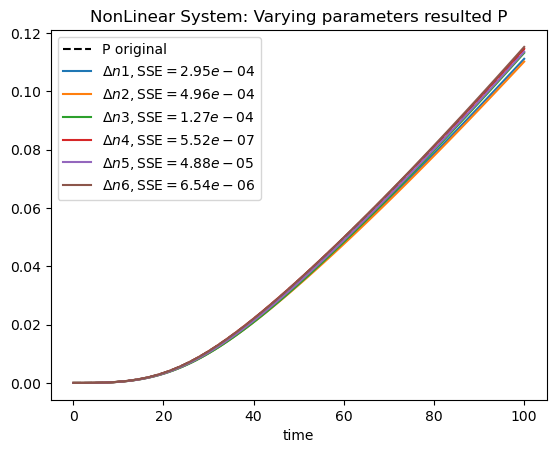

In [5]:
# simulated variation in nonlinear ode system
sol_0 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 1, 1))
sol_1 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 0.9, 1, 1, 1, 1, 1))
sol_2 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 0.9, 1, 1, 1, 1))
sol_3 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 0.9, 1, 1, 1))
sol_4 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 0.9, 1, 1))
sol_5 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 0.9, 1))
sol_6 = solve_ivp(ode_system, [tspan[0], tspan[-1]], y0=[N_crypts, 0, 0, 0, 0, 0], t_eval=tspan, method="RK45",
    args=(2*u, mu, u, mu, mu, 2*u, u, KA, KR, gamma3, gamma4, gamma5, delta, 1, 1, 1, 1, 1, 0.9))

# Compute SSE (Sum of Squared Errors) for each case. Notice the less the SSE the less the perturbation due to varying parameters. So we are looking for the max deviation.
SSEs = []
for i, sol_case in enumerate([sol_1, sol_2, sol_3, sol_4, sol_5, sol_6], start=1):
    sse = np.sum((sol.y[5, :] - sol_case.y[5, :]) ** 2)
    print(f"Case {i}: SSE = {sse}")
    SSEs.append(sse)
    
max_SSE_value = max(SSEs)
max_SSE_case = SSEs.index(max_SSE_value) + 1  # Adding 1 to match the 1-based indexing in the print output

print(f"Max SSE occurs at case {max_SSE_case}, with value: {max_SSE_value}")

plt.plot(sol.t, sol_0.y[5,:], label='P original', linestyle='--', color='black')
plt.plot(sol.t, sol_1.y[5, :], label=fr'$\Delta n1, \mathrm{{SSE}} = {SSEs[0]:.2e}$')
plt.plot(sol.t, sol_2.y[5, :], label=fr'$\Delta n2, \mathrm{{SSE}} = {SSEs[1]:.2e}$')
plt.plot(sol.t, sol_3.y[5, :], label=fr'$\Delta n3, \mathrm{{SSE}} = {SSEs[2]:.2e}$')
plt.plot(sol.t, sol_4.y[5, :], label=fr'$\Delta n4, \mathrm{{SSE}} = {SSEs[3]:.2e}$')
plt.plot(sol.t, sol_5.y[5, :], label=fr'$\Delta n5, \mathrm{{SSE}} = {SSEs[4]:.2e}$')
plt.plot(sol.t, sol_6.y[5, :], label=fr'$\Delta n6, \mathrm{{SSE}} = {SSEs[5]:.2e}$')
plt.xlabel('time')
plt.legend(loc='upper left')
plt.title("NonLinear System: Varying parameters resulted P")
plt.savefig('figures/NonLinearSensitivity.png')
plt.show()

sensitivities matrix S =
 [[0.0000e+00 0.0000e+00 1.9940e-06 0.0000e+00 0.0000e+00 1.9940e-11]
 [0.0000e+00 0.0000e+00 9.9900e-04 0.0000e+00 0.0000e+00 9.9901e-09]
 [0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]
Max Value: 1.0
Max Position: (2, 2)
elasticities matrix E =
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Max Value: (1+0j)
Max Position: (2, 2)


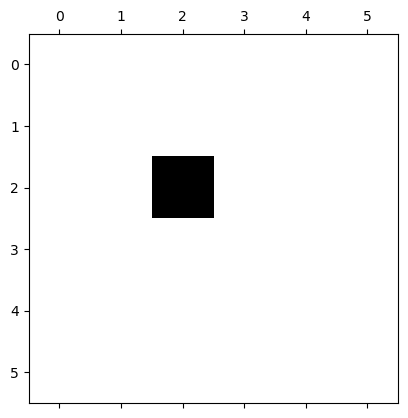

In [6]:
# Define the symbols used in the matrix
R12, R14, R23, R25, R36, R45, R56 = symbols('R12 R14 R23 R25 R36 R45 R56')
K_A, K_R, gamma3, gamma4, gamma5, delta = symbols('K_A K_R gamma_3 gamma_4 gamma_5 delta')
n3, n4, n5, P = symbols('n3 n4 n5 P')

# Define A, B, and C as per the provided equations
A = -R36 + gamma3 - (2 * gamma3 * n3) / K_A - (gamma3 * n4) / K_A - (gamma3 * n5) / K_A - delta
B = -R45 + gamma4 - (gamma4 * n3) / K_R - (2 * gamma4 * n4) / K_R - (gamma4 * n5) / K_R - delta
C = -R56 + gamma5 - (gamma5 * n3) / K_R - (gamma5 * n4) / K_R - (2 * gamma5 * n5) / K_R - delta

# Define the matrix J
J = Matrix([
    [-R12 - R14, 0, 0, 0, 0, 0],
    [R12, -R23 - R25, 0, 0, 0, 0],
    [0, R23, A, -gamma3 * n3 / K_A, -gamma3 * n3 / K_A, 0],
    [R14, 0, -gamma4 * n4 / K_R, B, -gamma4 * n4 / K_R, 0],
    [0, R25, -gamma5 * n5 / K_R, R45 - gamma5 * n5 / K_R, C, 0],
    [0, 0, R36 - R36 * P, 0, R56 - R56 * P, -R56 * n5 - R36 * n3]
])

# Display the original matrix J
# print("Matrix J:", J)

# Substitute n3, n4, n5, and P = 0 into the matrix (1st equilibrium points)
J_equilibrium = J.subs({n3: 0, n4: 0, n5: 0, P: 0})

# Display the evaluated matrix
# print("Evaluated Matrix J:", J_equilibrium)

J_result = np.array(J_equilibrium.subs(values).tolist(), dtype=float)

# compute sensitivity and elasticity matrix
l_right, v_right = sortEig(J_result)
v_right_max = v_right[:,-1]

l_left, v_left = sortEig(np.transpose(J_result))
v_left_max = v_left[:,-1]

np.set_printoptions(precision=4)
S = np.outer(v_left_max,v_right_max) / np.dot(v_left_max,v_right_max)
print("sensitivities matrix S =\n", np.real(S))

max_value_S = np.max(S)
max_position_S = np.unravel_index(np.argmax(S), S.shape)

print("Max Value:", max_value_S)
print("Max Position:", max_position_S)

E = S * J_result / l_left[-1]
print("elasticities matrix E =\n", np.real(E))

max_value_E = np.max(E)
max_position_E = np.unravel_index(np.argmax(E), E.shape)

print("Max Value:", max_value_E)
print("Max Position:", max_position_E)
plt.spy(np.real(E))